# Homework 2

**Before you start:** Read Chapter 3 Data Visualization and Chapter 4 Dimension Reduction in the textbook.

**Note:** Please make sure your plots are complete and presentable with a title, proper axis names, labels and legends if applicable.

Please enter the code along with your comments in the **TODO** sections.

Please refer to the **Hint** section if you do not know where to start. 

Alternative solutions are welcomed.

## Part 1: Advanced Data Visualization

### Problem 1 ##

**Dataset:** [Mismanaged waste](https://ourworldindata.org/grapher/mismanaged-plastic-waste?tab=chart&time=earliest..latest)

**Introduction:** Jambeck et al. quantified municipal and plastic waste streams from coastal populations in 2010 with projections to the year 2025. The authors define mismanaged and inadequately managed waste as follows: "mismanaged waste is material that is either littered or inadequately disposed. Inadequately disposed waste is not formally managed and includes disposal in dumps or open, uncontrolled landfills, where it is not fully contained. Mismanaged waste could eventually enter the ocean via inland waterways,
wastewater outflows, and transport by wind or tides. "

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install --upgrade openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [195]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("mismanaged-waste-global-total.csv") 
df.head()

Saving mismanaged-waste-global-total.csv to mismanaged-waste-global-total (3).csv


,Entity,Code,Year,Mismanaged waste (% global total) (% of global total)
0,Albania,ALB,2010,0.0933
1,Algeria,DZA,2010,1.6347
2,Angola,AGO,2010,0.1964
3,Anguilla,AIA,2010,0.0002
4,Antigua and Barbuda,ATG,2010,0.0039


**TODO1:**

*  Use a choropleth map to present the amount of mismanaged waste by country *(Highlight only the top 5 countries)*
*   The label (hover) should include the country name and percentage of mismanaged waste
*  Interpret your key findings from the map graph
*  Considering the manufacturing volume of each country, is this graph misleading?

In [196]:
df1=df.sort_values(by='Mismanaged waste (% global total) (% of global total)', ascending=False).head()
print(df1.head())

fig=px.choropleth(df1, locations='Entity', locationmode="country names", color='Mismanaged waste (% global total) (% of global total)', 
color_continuous_scale="ylgnbu", range_color=(0, 30),scope="world",hover_data={'Entity': True,'Mismanaged waste (% global total) (% of global total)': True}, 
labels={'Entity':'Entity','Mismanaged waste (% global total) (% of global total)': 'Percentage of mismanaged'})
fig.update_layout( title_text="Mismanaged Waste by Top 5 Countries")
fig.show()

          Entity Code  Year  \
28         China  CHN  2010   
80     Indonesia  IDN  2010   
134  Philippines  PHL  2010   
184      Vietnam  VNM  2010   
161    Sri Lanka  LKA  2010   

     Mismanaged waste (% global total) (% of global total)  
28                                             27.6966      
80                                             10.1019      
134                                             5.9153      
184                                             5.7588      
161                                             4.9968      



PROBLEM 1 TODO1:
*   Provided Choropleth map to present the top 5 countries per the amount of mismanaged waste
*   They are ranked in the order: China has the most mismanaged waste (28%), Indonesia (11%), Philippines (6%), Vietnam(6%) and Srilanka (5%)- All the % values are approximated to the nearest integer


*   China has a large manufacuring sector and therefore a higher percentage is expected (which is not a good news though...). However, the other countries were not expected to have higher mismanaged waste compared to global due to its less industrial presence. Dataset might need to provide more evidence on how the mismanaged waster per global total is calculated











**Hint:** 

* The variable "code" contains [three letters ISO country codes](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3). 
* [Use the built-in country code to create a choropleth map.](https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries)



### Problem 2 ##

**Dataset:** [Plastic disposal dataset](https://ourworldindata.org/plastic-pollution)

**Information:** Plastic disposal dataset methods shows how has global plastic waste disposal method changed over time. In the chart we see the share of global plastic waste that is discarded, recycled or incinerated from 1980 through to 2015.


In [197]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("activity.xlsx") 
df.head()

Saving activity.xlsx to activity (2).xlsx


,year,Value,Type
0,1960,88.1,Generation
1,1960,NaN,Composting*
2,1960,5.6,Recycling
3,1960,0.0,Combustion with energy recovery
4,1960,82.5,Landfilling and other disposal


**TODO1:**
*  Use an animated bar chart to indicate the change of trash disposal method through the years
*  Interpret your key findings from the graph


In [198]:
df_new=df.sort_values(by=['year','Type'], ascending='True')

fig=px.bar(df_new, x='Type', y='Value',color='Type', animation_frame='year', animation_group='Type')
#fig.update_layout(title_text='Change of trash disposal method through the years',transition = {'duration': 10000})
fig.show()

**Hint:** [Animated Bar Charts with Plotly Express](https://plotly.com/python/animations/#animated-bar-charts-with-plotly-express)




PROBLEM 2 TODO1:


*   During the period of 1960, the highest range of waste management methods was observed for "generation" and "landfilling and other disposal", with a minimal contribution from "recycling", "combustion", and "composting". This trend was consistent throughout the 1970s and 1980s. 
*   From 1990 to 2017, there was a continued high rate of "generation", and "landfilling and other disposal" while the utilization of "recycling", "combustion", and "composting" increased annually.



**TODO2:**
*  Suggest and show a better way to visualize the  data (choose the most approporiate visualization for this use case)

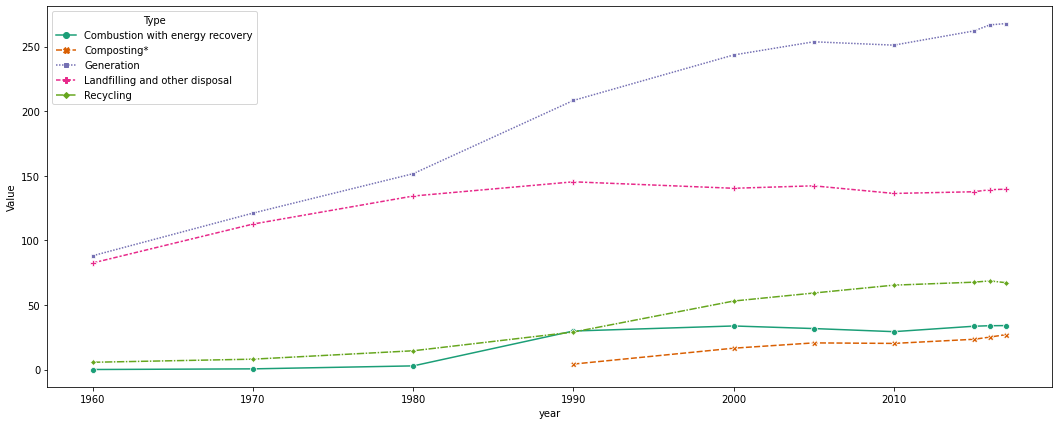

In [199]:
import matplotlib.pyplot as plt
#df_new_histogram = df.sort_values(by=['year','Type'], ascending='True')
import seaborn as sns
fig, axs = plt.subplots(figsize=(18, 7))
sns.lineplot(data=df_new, x="year", y="Value", hue="Type", style="Type",palette= "Dark2", markers=True, dashes= True)

#fig = plt.plot(df_new_histogram, x = 'Type', y = 'Value', color = 'Type', animation_frame = 'year', animation_group = 'Type')
#fig.update_layout(title_text='Change of trash disposal method through the years',transition = {'duration': 10000})
fig.show()

PROBLEM 2 TODO2:


*   Line Graph is a great way to visualize a teme series data and it clearly shows the trends over the years



### Problem 3 ##

**Dataset:** [Global Fortune 500](https://www.kaggle.com/edgarhuichen/fortune-global-500)

**Introduction:** Fortune Global 500 List is a list of largest corporations worldwide which are measured by their total fiscal year revenues. Companies rankings sorted by total revenues for their respective fiscal years ended on or before March 31 of the relevant year.

In [200]:
#Upgrade the package "plotly" before you start to avoid future syntax error
#You only need to upgrade it once
!pip install plotly --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [201]:
#Import packages
import pandas as pd
import numpy as np
import plotly.express as px

#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Global Fortune 500.csv") 
df.head()

Saving Global Fortune 500.csv to Global Fortune 500 (2).csv


,Rank,Company Name,Country,Number of Employees,Previous Rank,Revenues($millions),Revenue Change,Profits($millions),Profit Change,Assets($millions),Unnamed: 10,Unnamed: 11
0,1,Walmart,USA,"2,300,000",1,485873,0.80%,13643,-7.20%,198825,NaN,NaN
1,2,State Grid,China,"926,067",2,315199,-4.40%,9571.3,-6.20%,489838,NaN,NaN
2,3,Sinopec Group,China,"713,288",4,267518,-9.10%,1257.9,-65.00%,310726,NaN,NaN
3,4,China National Petroleum,China,"1,512,048",3,262573,-12.30%,1867.5,-73.70%,585619,NaN,NaN
4,5,Toyota Motor,Japan,"364,445",8,254694,7.70%,16899.3,-12.30%,437575,NaN,NaN


**TODO1:**
*  Build a treemap of the companies with "country" as the first hierarchy and "company" as the second hierarchy (Only show top 5 businesses for each country)
*  The size of each block should indicate the corresponding company's revenue
*  Interpret your key findings from the treemap

In [202]:
import plotly.express as px

df1=df.groupby(['Country','Company Name', 'Rank']).agg(Revenue=('Revenues($millions)','sum')).reset_index()
df2=df1.sort_values(by=['Country','Rank'], ascending=True).groupby(['Country']).head(5)

fig=px.treemap(df2, path=["Country", 'Company Name'], values='Revenue', color='Country')
fig.update_layout(title_text='Top 5 Business for Each Country', margin = dict(t=50, l=50, r=25, b=25))
fig.show()

PROBLEM 3 TODO1



*   Top 2 Highest Revenue Earners from Top 5 Businesses are USA and China
*   Israel and U.A.E is the least earner from their top 5 businesses
*   Many of the low earners like Belgium, Sweden, Malaysia and likewise don't have enough companies (atleast 5) within the Global Fortune 500 list.





**Hint:** [Build a treemap with Plotly](https://plotly.com/python/treemaps/)




### Problem 4 ##

**Dataset:** [Air Quality](https://archive.ics.uci.edu/ml/datasets/Air+Quality)

**Introduction:** The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

In [203]:
#Import required libraries
import scipy.stats as stats
from sklearn import preprocessing
%matplotlib inline

#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("Air Quality.xlsx") 
df.head()

Saving Air Quality.xlsx to Air Quality (2).xlsx


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


**TODO1:**
*  Plot a correlation heatmap for the Air Quality dataset
*  Interpret your key findings from the correlation heatmap (value of correlation should be displayed in the heatmap)

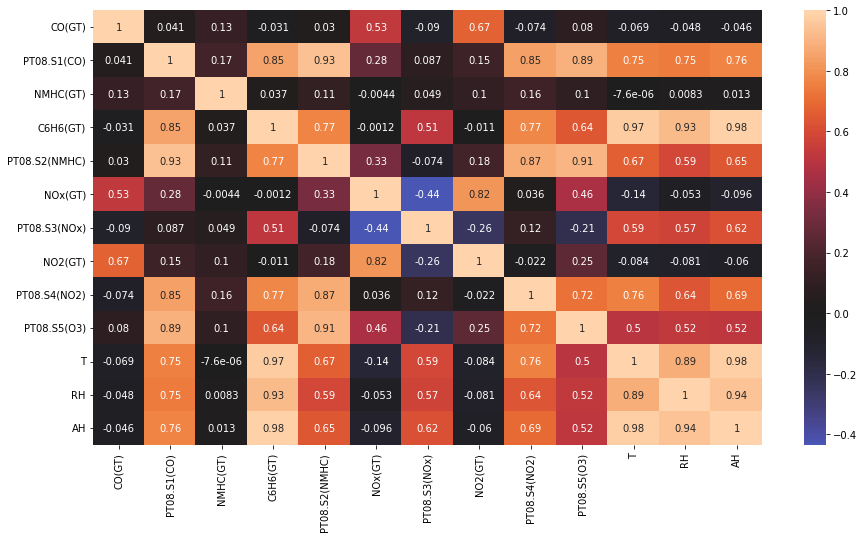

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
# Change the colormap to a divergent scale and fix the range of the colormap
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1)
# Include information about values (example demonstrate how to control the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.heatmap(corr, annot=True, center=0, ax=ax)

PROBLEM 4 TODO1:


*   The correlation heatmap is to identify linear relationship between all numerical variables. A positive relationship between two variables is indicated by a cell color closer to red (closer to 1). 
*   The response variables are highly correlated which shows the consistency of the sensor readings.



**Hint:** [Build a heatmap with Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Part 2: Dimension Reduction

### Problem 5

please consider the **iris dataset**:


In [205]:
#Import the built-in dataset (Wine recognition) for this problem
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
print(sklearn.datasets.load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [206]:
#laod the dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [207]:
# laod the vector of target variable
y = iris.target


**TODO1:**

*  Determine first two principal component scores for the data set with eigenvalues and eigenvectors on the RAW data (without standardization). 

*  Note that you are expected to perform matrix multipication, eigen value calculation **only** with the package Numpy, and sorted eigenvalues and eigenvectors in descending order (i.e. $\lambda_{0} \geq \lambda_{1} \geq \lambda{2} \geq ... \geq \lambda_{n}$ so do the eigenvectors).

In [209]:
# PCA without using built in functions
X_Meandf=(X-np.mean(X , axis = 0)) #1. compute Mean centered Data
X_covmatrix = np.cov(X_Meandf , rowvar = False) #2. Compute Covariance Matrix from Raw Data
eigen_values , eigen_vectors = np.linalg.eig(X_covmatrix) #3. Compute Eigen Value and Eigen Vectors

#4. sorting the eigenvalues and eigen vectors in descending order
idx = eigen_values.argsort()[::-1]   
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx]  
print(eigen_values)
print(eigen_vectors)

pca=X_Meandf.dot(eigen_vectors) # PCA= mean adjusted data matrix * eigen vectors
pca[pca.columns[0:2]]


[4.22824171 0.24267075 0.0782095  0.02383509]
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


,0,1
0,-2.684126,-0.319397
1,-2.714142,0.177001
2,-2.888991,0.144949
3,-2.745343,0.318299
4,-2.728717,-0.326755
...,...,...
145,1.944110,-0.187532
146,1.527167,0.375317
147,1.764346,-0.078859
148,1.900942,-0.116628


**Hint:** 

1. [Eigen value calculation with Numpy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

2. [Sorting a Numpy array](https://sparkbyexamples.com/python/numpy-sort-arrays-examples/#:~:text=By%20Sorting%20a%20NumPy%20array,%5B12%208%206%205%5D.)

**TODO2:**

*  Perform the data standardization on the data without using any buit-in functions.

*  Determine the first two principal component scores with eigenvaues and eigenvectors on the standardized data by updataing your code form **TODO1**. (i.e. your code from **TODO** one should not be changed; you should only add a cell of code for standardization.)

In [210]:
# PCA Calc on standardized data with no built in function
X_df=((X-np.mean(X , axis = 0))/np.std(X , axis = 0)) #1. Compute Standardized Data
X_covmatrix = np.cov(X_df , rowvar = False) #2. Compute Covariance Matrix from Raw Data
eigen_values , eigen_vectors = np.linalg.eig(X_covmatrix) #3. Compute Eigen Value and Eigen Vectors

#4. sorting the eigenvalues and eigen vectors in descending order
idx = eigen_values.argsort()[::-1]   
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx] 
#eigen_values[::-1].sort() #4. sorting the eigenvalues and eigen vectors in descending order
#eigen_vectors[::-1].sort()
print(eigen_values)
print(eigen_vectors)

pca=X_df.dot(eigen_vectors) # PCA= mean adjusted data matrix * eigen vectors
pca[pca.columns[0:2]]




[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


,0,1
0,-2.264703,-0.480027
1,-2.080961,0.674134
2,-2.364229,0.341908
3,-2.299384,0.597395
4,-2.389842,-0.646835
...,...,...
145,1.870503,-0.386966
146,1.564580,0.896687
147,1.521170,-0.269069
148,1.372788,-1.011254


**TODO3:**

*  Use the built-in function called `PCA()` on the raw data to calculate the first two principal components.

*  For each of the components, indentify the explained variance, proportion variance, and cummulative proportion of variance.

* Compare your result with **TODO1**, are they same? (You might expect that you will have the same result wilth **TODO1**. However, `PCA()` function automatically does `x-mean()` transformation. Therefore, do not worry that your result from this one is different than the result performed from **TODO1**.)

**Hint**: 

* [PCA Python](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [211]:
# PCA on RAW data using built in functions
from sklearn import decomposition
pca = decomposition.PCA ()
pca.fit(X)
X_transformed=pca.transform(X)
explained_variance = pca.explained_variance_
proportion_variance = pca.explained_variance_ratio_
cummulative_proportion_of_variance = pca.explained_variance_ratio_.cumsum()

#print("Principal Components(first five rows): \n", X_transformed[0:5,:])
print("\n Explained variance : \n", explained_variance)
print("\n Proportion_variance : \n", proportion_variance)
print("\n cummulative proportion of variance : \n", cummulative_proportion_of_variance)
      
pca_X_Raw=pd.DataFrame(data = X_transformed)
pca_X_Raw[pca_X_Raw.columns[0:2]]



 Explained variance : 
 [4.22824171 0.24267075 0.0782095  0.02383509]

 Proportion_variance : 
 [0.92461872 0.05306648 0.01710261 0.00521218]

 cummulative proportion of variance : 
 [0.92461872 0.97768521 0.99478782 1.        ]


,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


PROBLEM 5 TODO3:


*   We got the same results for TODO1 and TODO3 as expected



**TODO4:**

*  Use the built-in function called `preprocessing.StandardScaler` and `PCA` to calculate the first two principal components. 

*  For each of the components, determine the explained variance, propotion variance, and cummulative proportion of variance.

* Compare your result with **TODO2**, are they same?

**Hint**: [Data Standardization in Python](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [212]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_s=pd.DataFrame(scaler.fit_transform(X.iloc[::]))

In [ ]:
#Finding out the explained variance, propotion variance and cummulative proportion of variance for each prin
pca = decomposition.PCA ()
pca.fit(X_s)
X_transformed=pca.transform(X_s)
explained_variance = pca.explained_variance_
proportion_variance = pca.explained_variance_ratio_
cummulative_proportion_of_variance = pca.explained_variance_ratio_.cumsum()

print("\n Explained variance : \n", explained_variance)
print("\n Proportion_variance : \n", proportion_variance)
print("\n cummulative proportion of variance : \n", cummulative_proportion_of_variance)


 Explained variance : 
 [2.93808505 0.9201649  0.14774182 0.02085386]

 Proportion_variance : 
 [0.72962445 0.22850762 0.03668922 0.00517871]

 cummulative proportion of variance : 
 [0.72962445 0.95813207 0.99482129 1.        ]


In [213]:
#First two Principal component scores on Standardized data
pca_X_Standard=pd.DataFrame(data = X_transformed)
pca_X_Standard[pca_X_Standard.columns[0:2]]

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


PROBLEM 5 TODO4:
*   We got the same results for TODO2 and TODO4 as expected





**TODO5:**

*  Integrate from **TODO1** to **TODO4**, why is it important to standardize(normalize) variables before perfroming PCA

*  Plot the records on 2D plane defined by the first two PCA components calcualted with standardized data and dffierentiate them using by **target** (i.e. $y$).

*  Make some meaningful interpretation about the plot.

In [227]:
# Scatter plot with First 2 Principle components of standardized data
fig=px.scatter(x=pca_X_Standard[0], y=pca_X_Standard[1],color=y)
fig.update_layout(title_text='First Two PC of standardized data by Target')

* PCA will calculate new projection of data and reduce number of numerical variables preserving the largest possible variance.
* However, if in the dataset, variables are with varying ranges, variables with higher ranges will dominate over those with smaller range variables, which will lead to biased results. 

* So if not normalized, variance will be higher to the higher range variables and the variables with smaller ranges will have lower variance and these lower variance variables will be dropped and then model is going to be biased

* Post standardizing the data, the range of all variables are between -1 and 1. This helps to ensure unbiasedness in the model.


Problem 5 Graph

* The graph shows that the first principal component separates the data into two clusters.
* The left cluster contains the flower from the Iris setosa species. You can see a few outliers, such as one setosa flower whose second PC score (about -1) is much smaller than the other setosa flowers. 

### Problem 6

**Dataset:** Life Expectancy

**Introduction:** The above dataset gives life expectancy related data for 37 countries in2014. 

Consider only the following variables in your analysis: 'GDP', 'Income composition of resources', 'Schooling', and 'Total expenditure'.

In [215]:
#Import useful package
from sklearn.manifold import MDS

#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Life Expectancy.csv") 
df.head()

Saving Life Expectancy.csv to Life Expectancy (4).csv


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,Australia,2014,Developed,82.7,6,1,9.71,10769.363050,91.0,340,...,92,9.42,92,0.1,62214.691200,2346694.0,0.6,0.6,0.936,20.4
2,Austria,2014,Developed,81.4,66,0,12.32,8350.193523,98.0,117,...,98,11.21,98,0.1,51322.639970,8541575.0,1.8,2.0,0.892,15.9
3,Bangladesh,2014,Developing,71.4,132,98,0.01,10.446403,97.0,289,...,97,2.82,97,0.1,184.565430,15945279.0,18.1,18.6,0.570,10.0
4,Belgium,2014,Developed,89.0,76,0,12.60,7163.348923,98.0,70,...,99,1.59,99,0.1,47439.396840,112957.0,1.0,1.0,0.890,16.3


**TODO1:**

* Standardize the numeric variables in the given data frame
* Run MDS() (Multi Dimensional Scaling) on the standardized data 
  - **Hint:** n_components = 2
* Plot data points on a 2D plane defined by the first two components
* Use color to differentiate the statues of each country with legend
* Use text label to specify the country name for each point
* Comment your findings from the graph

**Hint:**  [MDS Python](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html)

In [216]:
# Considering the 'GDP', 'Income composition of resources', 'Schooling', and 'Total expenditure' variables
df1=df[['GDP', 'Income composition of resources', 'Schooling', 'Total expenditure']]
df1.head()

,GDP,Income composition of resources,Schooling,Total expenditure
0,612.696514,0.476,10.0,8.18
1,62214.691200,0.936,20.4,9.42
2,51322.639970,0.892,15.9,11.21
3,184.565430,0.570,10.0,2.82
4,47439.396840,0.890,16.3,1.59


In [217]:
#Impute the missing records by using the mean value of records
for col in df1.columns:
 mean=df1[col].mean()
 for col2 in df1.columns:
   if(col2==col):
     df1[col]=df1[col].fillna(mean) 



<ipython-input-217-7a72564bad0d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [218]:
#Standardizing the numerical variables
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1=pd.DataFrame(scaler.fit_transform(df1))

In [219]:
#Applying Multi Dimensional Scaling on standardized data
mds = MDS(random_state=0)
df_transform = mds.fit_transform(df1)


In [220]:
# Scatter plot on First 2 components of MSD
fig=px.scatter(x=df_transform[:,0], y=df_transform[:,1], color=df['Status'], text=df['Country'])
fig.update_layout(title_text='First TWO PC after MSD')

PROBLEM 6 TODO1


*   Most of the developed countries are away from developing countries showing the difference in their attributes
*   Interesting finding is that Canada is developing and Japan is developed but are closer to each showing that the attributes of both countries are almost similar.
* Many of the african countries are away from other developing countries. It might be worse than other developing countries in terms of the attributes (since other developing countries are bit closer to the developed countries)



### Problem 7

Dataset: Game of thrones Books

Introduction: If you haven't heard of Game of Thrones, then you must be really good at hiding. Game of Thrones is the hugely popular television series by HBO based on the (also) hugely popular book series A Song of Ice and Fire by George R.R. Martin. You need to analyze the co-occurrence network of the characters in the Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books.

This dataset (5 files attached in zip file) constitutes a network and is given as a text file describing the edges between characters, with some attributes attached to each edge.

Loading the required libraries

In [221]:
!pip install pyvis
import pyvis
import networkx as nx
from pyvis.network import Network
!pip install decorator==5.0.9 
!pip install --user networkx==2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**TODO1:**

- Load data for the all the books of Game of Thrones (Merge all files into one and create a dataframe)
- Select only the rows which has weight more than 10

In [222]:
# import files
import pandas as pd
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df1 = pd.read_csv("book1.csv")
df2 = pd.read_csv("book2.csv")
df3 = pd.read_csv("book3.csv")
df4 = pd.read_csv("book4.csv")
df5 = pd.read_csv("book5.csv")


Saving book5.csv to book5 (5).csv
Saving book4.csv to book4 (5).csv
Saving book3.csv to book3 (5).csv
Saving book2.csv to book2 (5).csv
Saving book1.csv to book1 (11).csv


In [223]:
df= df1.append([df2,df3,df4,df5])
df=df.query('weight>10')

**TODO2:**
Load the dataframe as networkx graph

Hint: [Network analysis in python](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html)

/root/.local/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



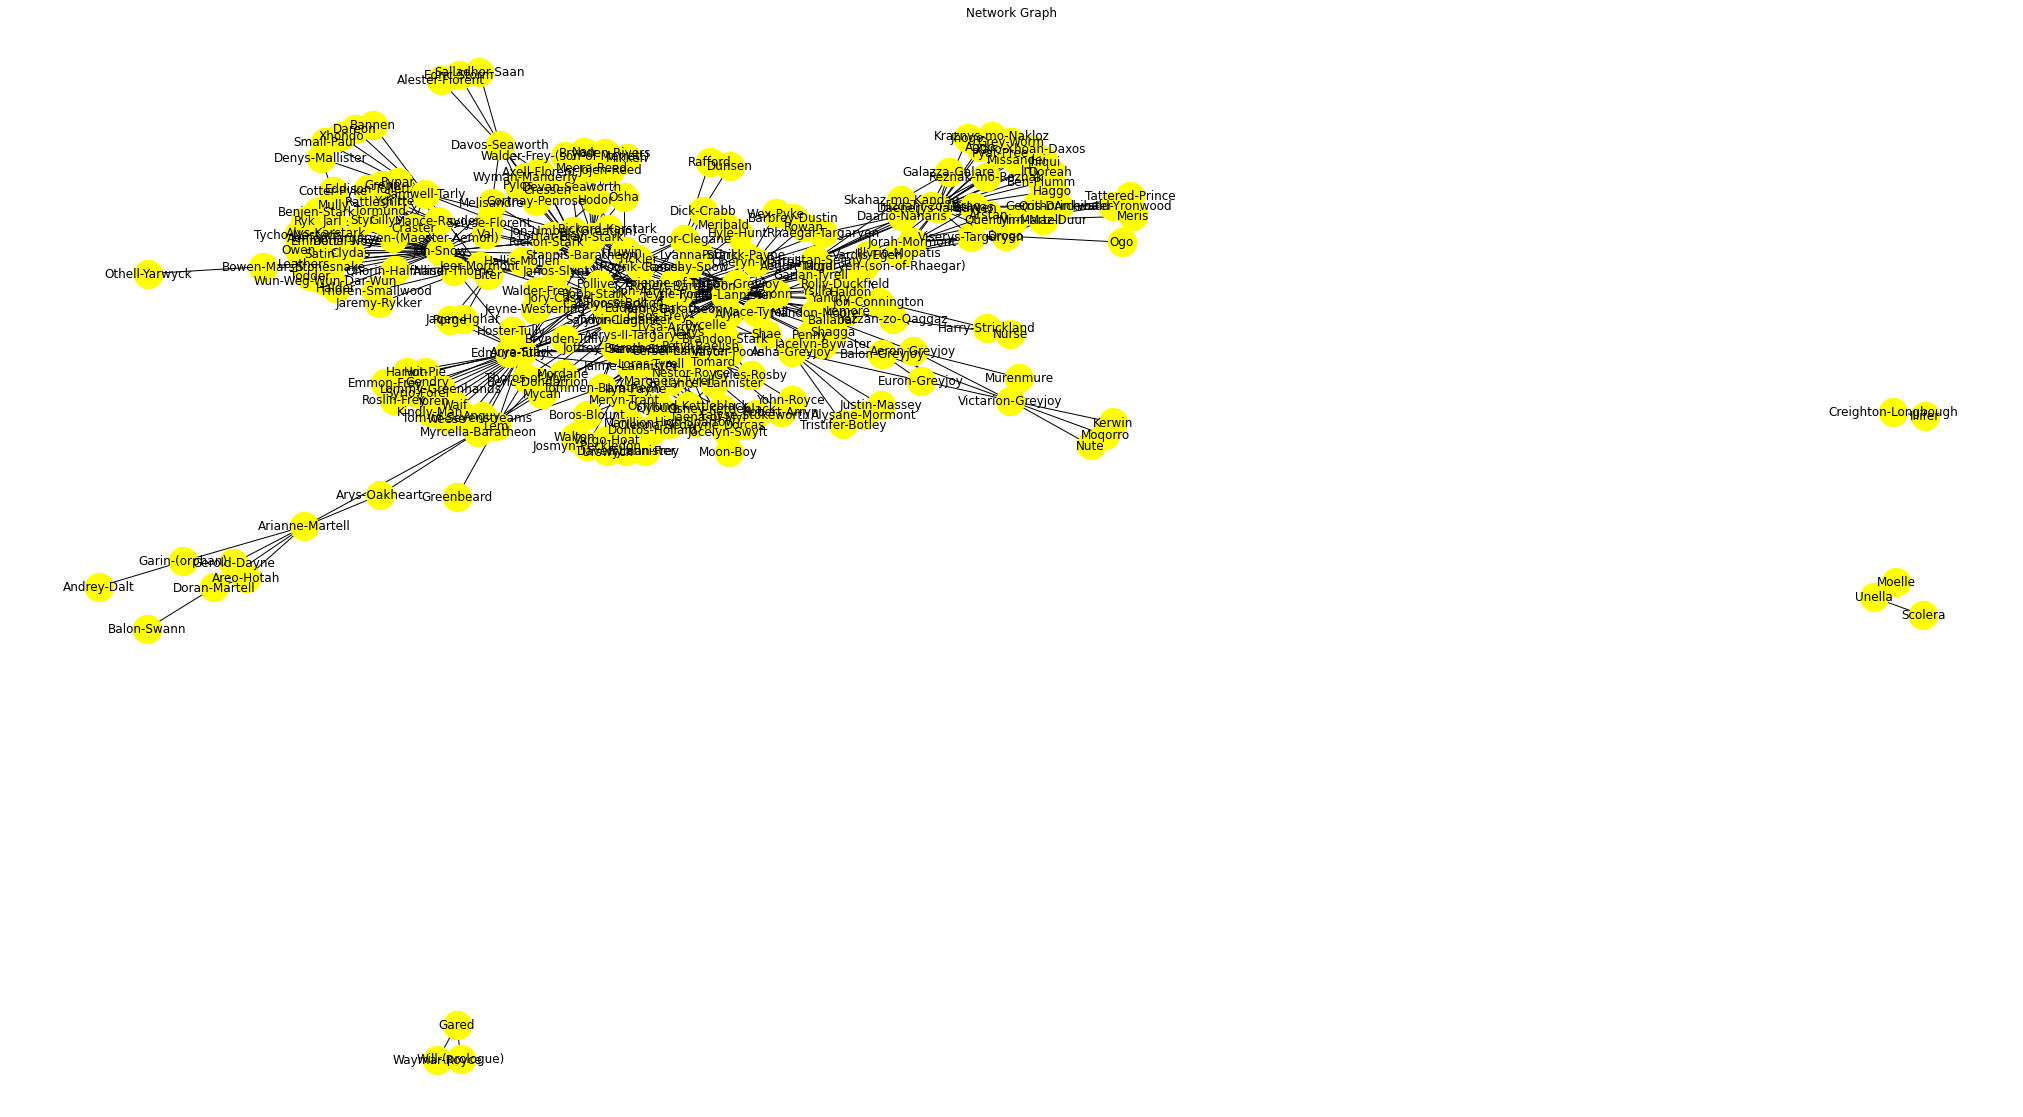

In [224]:
#Loading the dataframe as network graph
import matplotlib.pyplot as plt
G=nx.from_pandas_edgelist(df, source = 'Source', target = 'Target') 
plt.figure(figsize = (36,20))
nx.draw_networkx(G , with_labels = True, node_color = 'yellow', node_size = 800)
plt.title("Network Graph")
plt.axis('off')
plt.show();

In [225]:
print("No of unique characters:", len(G.nodes))
print("No of connections:", len(G.edges))

No of unique characters: 258
No of connections: 557


**TODO3:**

Create viz network
Hint: [Use Pyvis](https://pyvis.readthedocs.io/en/latest/)

In [226]:
#Network Graph using Pyvis
from pyvis.network import Network
import networkx as nx
ng = Network(height=500, width=500, notebook=True)
ng.toggle_hide_edges_on_drag(True)
ng.from_nx(G)
ng.show("ex.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
